In [2]:
import sys
print(sys.executable)

c:\Users\Medhansh Mathur\OneDrive\Desktop\stock_predictor\venv\Scripts\python.exe


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from keras.layers import Dense,Dropout ,LSTM
from keras.models import Sequential


In [4]:
start= '2012-01-01'
end = '2025-12-31'
stock = 'GOOG'

data=yf.download(stock ,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520700,16.569402,16.331336,16.440357,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387976,15.994635,15.357568,15.982273,233776981


In [6]:
ma_100_days=data.Close.rolling(100).mean()

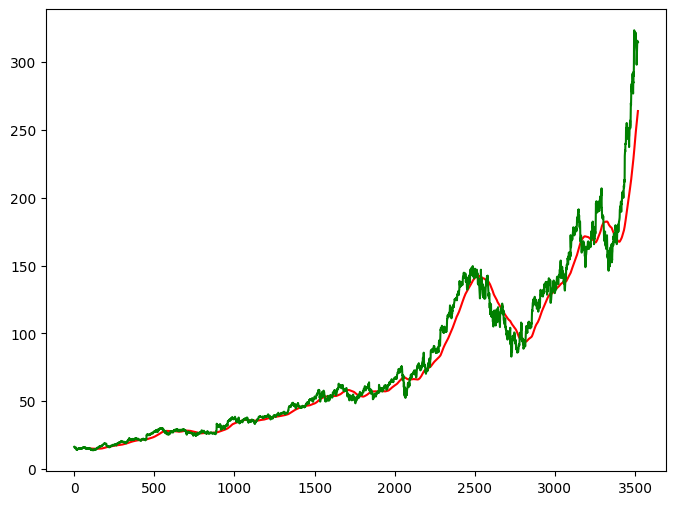

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days=data.Close.rolling(200).mean()

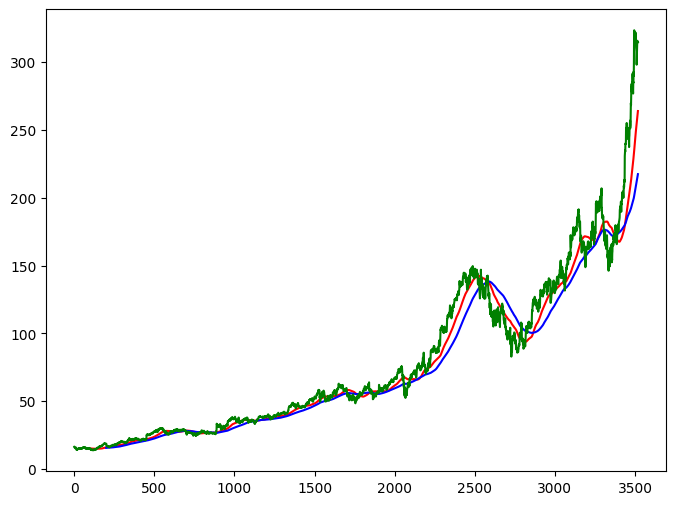

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape

(2815, 1)

In [13]:
data_test.shape

(704, 1)

In [14]:

scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale=scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [17]:
x,y=np.array(x),np.array(y)

In [18]:
model = Sequential()
model.add(LSTM(units=50,activation = 'relu', return_sequences=True,
               input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\Medhansh Mathur\OneDrive\Desktop\stock_predictor\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [20]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - loss: 0.0256
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0057
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0059
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.0052
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0047
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0047
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0040
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0039
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0039
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0045
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0033
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0031
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0033
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0032
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.0031
Epo

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days=data_train.tail(100)

In [23]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [24]:
data_test

Ticker,GOOG
0,100.029747
1,100.635201
2,99.543404
3,99.781616
4,100.724556
...,...
799,315.679993
800,315.670013
801,314.959991
802,314.390015


In [25]:
data_test_scale=scaler.fit_transform(data_test)

In [26]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])
x,y=np.array(x),np.array(y)

In [27]:
y_predict=model.predict(x)

85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [28]:
scale=1/scaler.scale_

In [29]:
y_predict=y_predict*scale

In [30]:
y=y*scale

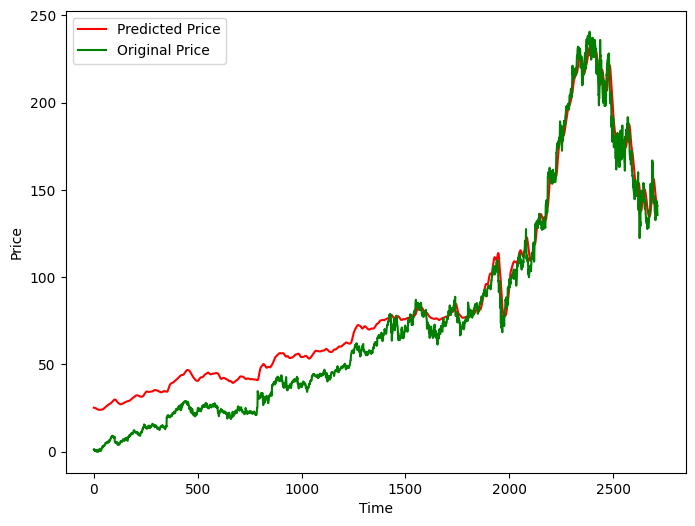

In [31]:
plt.figure(figsize=(8,6))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')